# Десятая лабораторная работа

In [1]:
import thinkdsp as td
import numpy as np
import matplotlib.pyplot as plt

## Задание 1.
Изменить пример из `chap10.ipynb` добавлением нулей, чтобы избежать эффект "заворота" и устранить лишнюю ноту в начале фрагмента.

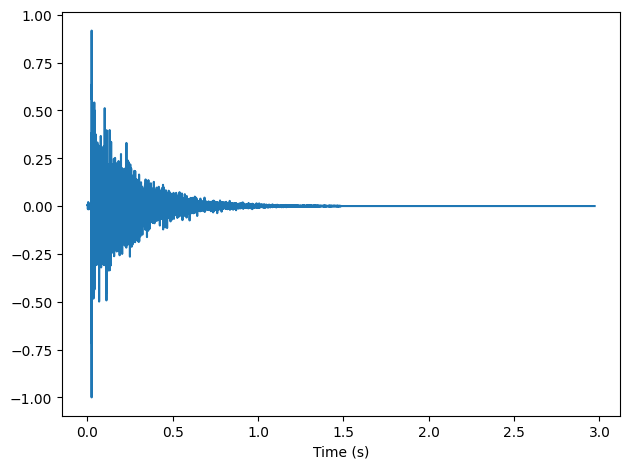

In [2]:
response = td.read_wave('wavs/180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.truncate(2**16)
response.zero_pad(2**17)

response.normalize()
response.plot()
td.decorate(xlabel='Time (s)')

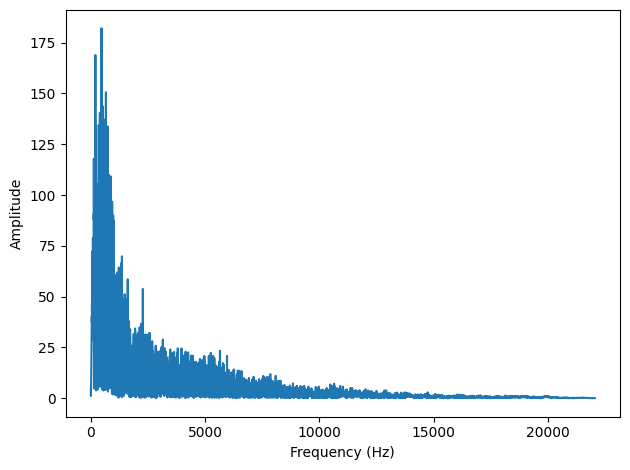

In [3]:
transfer = response.make_spectrum()
transfer.plot()
td.decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

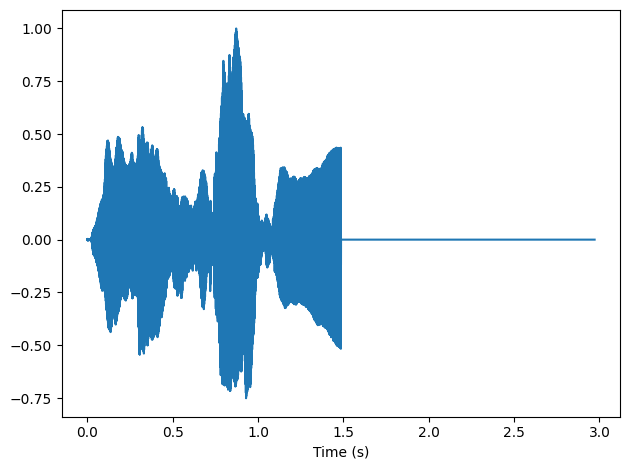

In [4]:
violin = td.read_wave('wavs/92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(2**16)
violin.zero_pad(2**17)

violin.normalize()
violin.plot()
td.decorate(xlabel='Time (s)')

In [5]:
violin.make_audio()

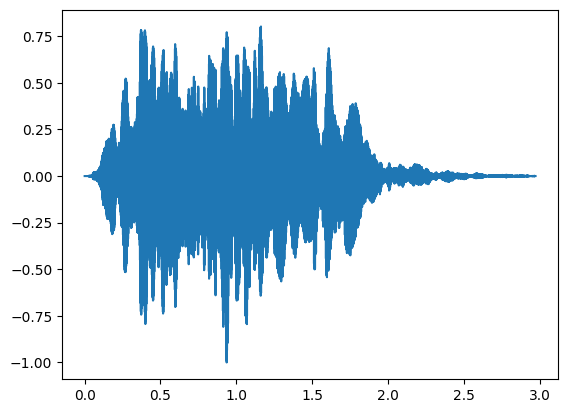

In [6]:
spectrum = violin.make_spectrum()
output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()

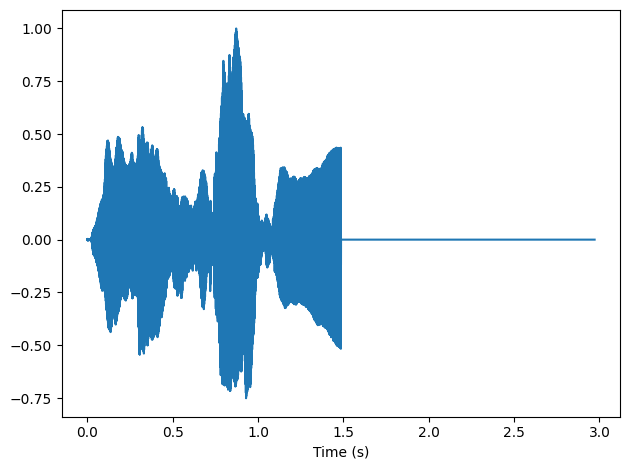

In [7]:
violin.plot()
td.decorate(xlabel='Time (s)')

In [8]:
output.make_audio()

Теперь, после умножения сигналов в частотном пространстве, дополнительная нота, как в примере из chap10, не появилась.

## Задание 2.
Посмотреть коллекцию импульсных характеристик на библиотеке Open Air. Скачать одну, и найти короткие записи с той же частотой дискретизации.
Смоделировать двумя способами звучание записи в том пространстве, где была измерена импульсная характеристика. Применить свёртку самой записи с импульсной характеристикой, и умножение ДПФ записи на вычисленный фильтр, соответствующий импульсной характеристики.

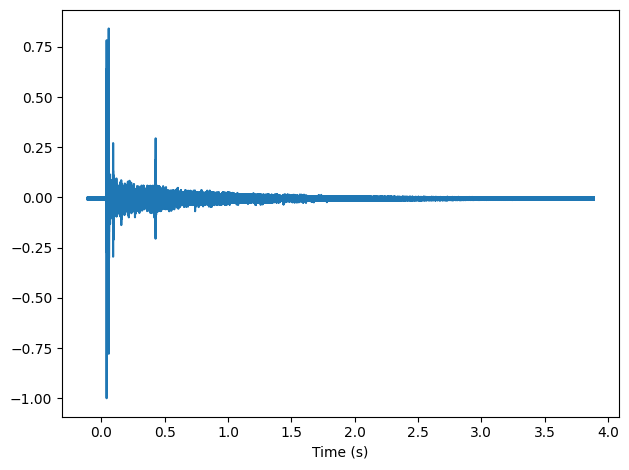

In [9]:
response = td.read_wave('wavs/saint-andrews-church-48k.wav')

response = response.segment(0, 4)
response.shift(-start)

response.normalize()
response.plot()
td.decorate(xlabel='Time (s)')

Была выбрана импульсная характеристика внутри церкви.

In [10]:
response.make_audio()

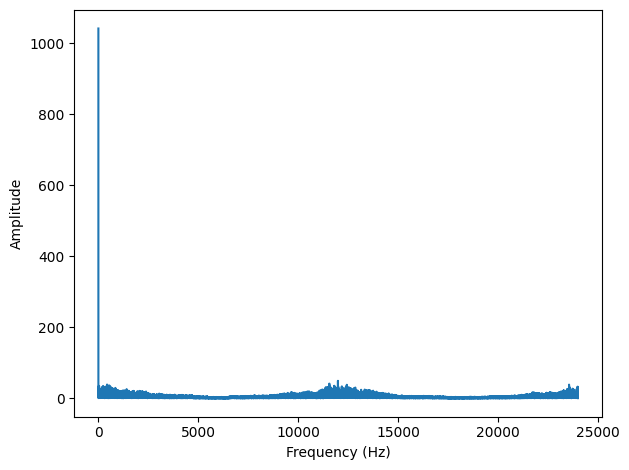

In [11]:
transfer = response.make_spectrum()
transfer.plot()
td.decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

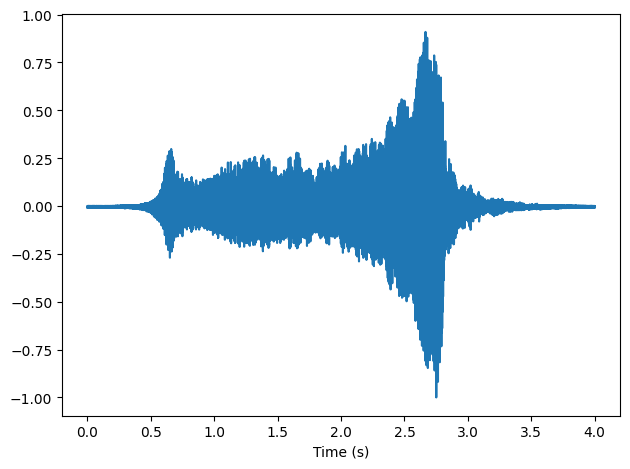

In [12]:
wave = td.read_wave('wavs/120090__suso_ramallo__violin_end.wav')

wave.truncate(len(response))
wave.normalize()
wave.plot()
td.decorate(xlabel='Time (s)')

In [13]:
wave.make_audio()

Запись скрипки до преобразований.

In [14]:
spectrum = wave.make_spectrum()
len(spectrum.hs), len(transfer.hs)

(96001, 96001)

In [15]:
spectrum.fs

array([0.000000e+00, 2.500000e-01, 5.000000e-01, ..., 2.399950e+04,
       2.399975e+04, 2.400000e+04])

In [16]:
transfer.fs

array([0.000000e+00, 2.500000e-01, 5.000000e-01, ..., 2.399950e+04,
       2.399975e+04, 2.400000e+04])

In [17]:
convolved = wave.convolve(response)
convolved.normalize()
convolved.make_audio()

Запись скрипки после свёртки.

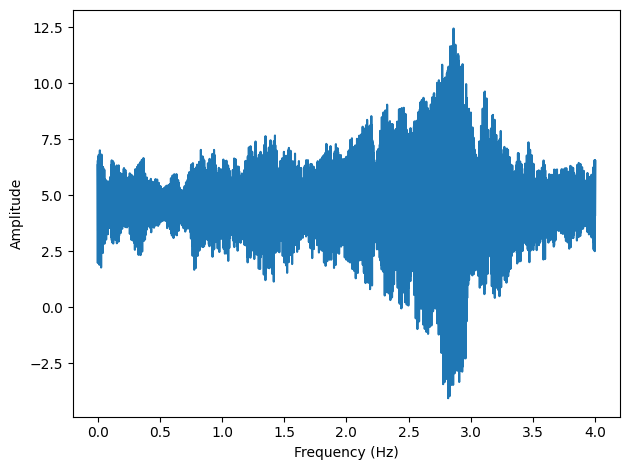

In [18]:
output = (spectrum * transfer).make_wave()
output.plot()
td.decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Запись после умножения.

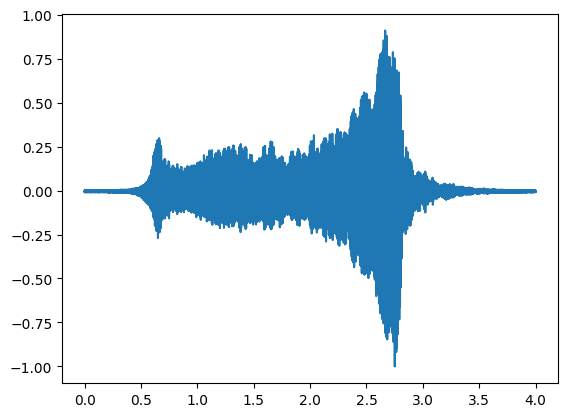

In [19]:
wave.plot()

Запись перед умножением.

In [20]:
output.make_audio()

Запись после умножения в пространстве частот.